In [4]:
from fore_utils import *

window_size = 24
steps = 12

df = pd.read_csv('synthetic_wind_speeds_2018_2022.csv')

In [6]:
model = MLP(window_size, 64, steps)
model.load_state_dict(torch.load('model.pth'))

train_loader = DataLoader(WindSpeedDataset(df, window_size, steps), batch_size=32, shuffle=True)

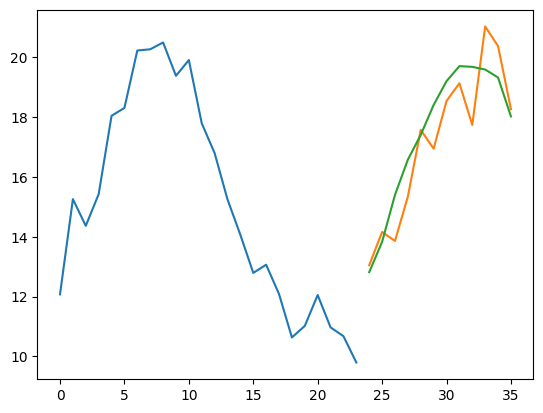

In [7]:
for batch in train_loader:
    x, y = batch
    break

y_pred = model(x.float())

plt.plot(np.arange(window_size), x[0].detach().numpy(), label='Input')
plt.plot(np.arange(window_size,window_size+steps), y[0].detach().numpy(),  label='Target')
plt.plot(np.arange(window_size,window_size+steps), y_pred[0].detach().numpy(), label='Prediction')